# Task 3: Classification of samples that are not linearly separable

### Part 1

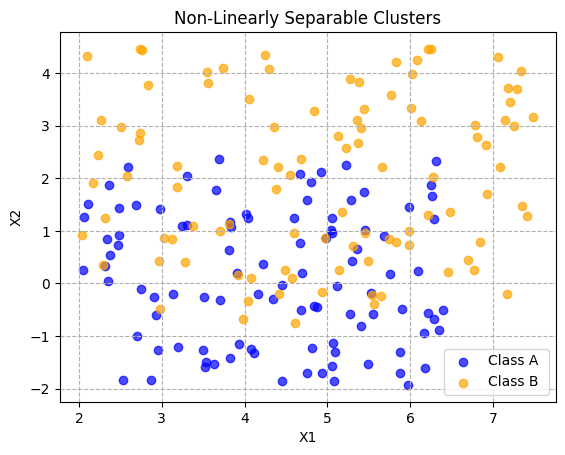

In [9]:
import numpy as np
from tools import generate_dataset, plot_datasets

data, labels = generate_dataset(
    n_samples = 100,
    means = np.array([[2.0, -2.0], [2.0, -1.0]]),
    standard_deviations = [4.5, 5.5]
)

plot_datasets(data, labels, title='Non-Linearly Separable Clusters')

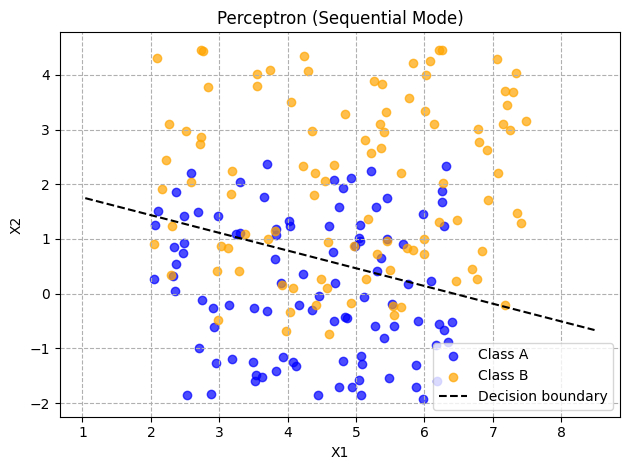

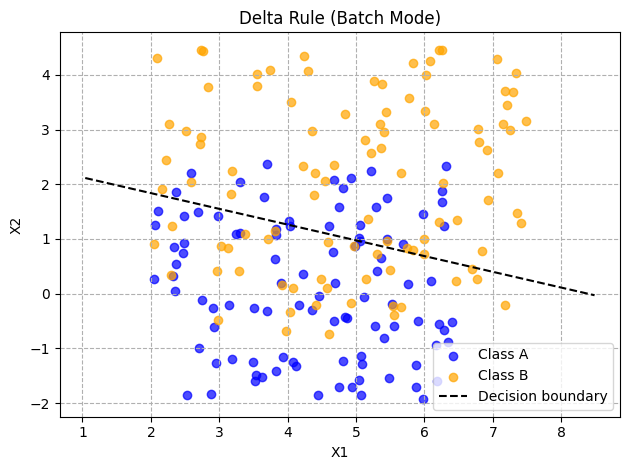

Accuracy: 0.70 Sensitivity: 0.79 Specificity: 0.62
Accuracy: 0.72 Sensitivity: 0.68 Specificity: 0.77


In [10]:
from tools import (
    PerceptronClassifier, DeltaRuleClassifier, plot_decision_boundary, evaluate_model
)

perceptron = PerceptronClassifier()
delta_rule = DeltaRuleClassifier()

# Train Perceptron (Sequential Mode)
perceptron.fit(data, labels, learn_rate=0.01, epochs=20, batch=False)
plot_decision_boundary(perceptron.weights, data, labels, "Perceptron (Sequential Mode)")

# Train Delta Rule (Batch Mode)
change_labels = lambda labels: np.where(labels == 0, -1, 1)
delta_rule.fit(data, change_labels(labels), learn_rate=0.0001, epochs=5000, batch=True)
plot_decision_boundary(delta_rule.weights, data, change_labels(labels), "Delta Rule (Batch Mode)")

# Evaluate the classifiers on the training data 
metrics_perceptron = evaluate_model(perceptron, data, labels)
metrics_delta = evaluate_model(delta_rule, data, change_labels(labels))

for metric in [metrics_perceptron, metrics_delta]:
    print(f"Accuracy: {metric[0]:.2f} Sensitivity: {metric[1]:.2f} Specificity: {metric[2]:.2f}")

### Part 2

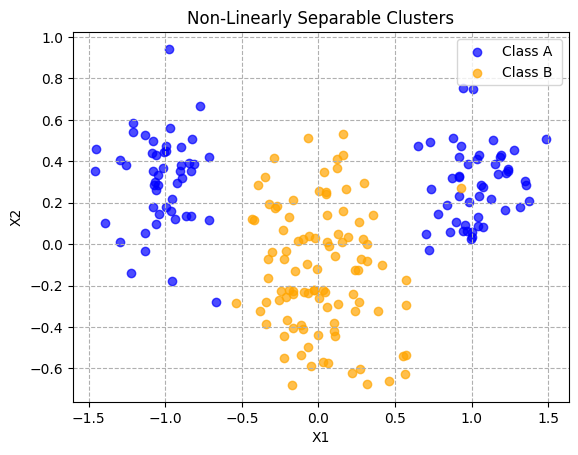

In [11]:
from tools import generate_subsample_dataset

data, labels, classA, labels_A, classB, labels_B = generate_subsample_dataset() 
plot_datasets(data, labels, title='Non-Linearly Separable Clusters')

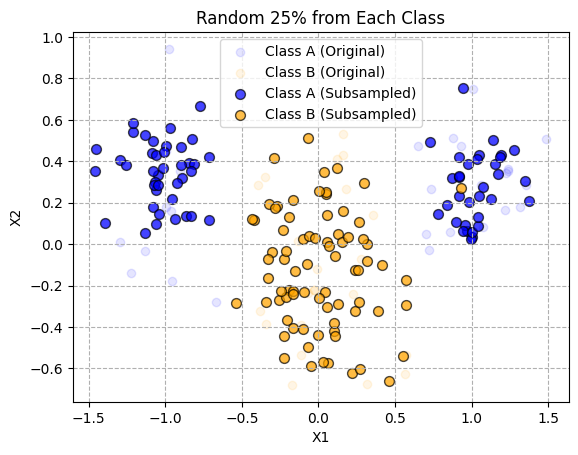

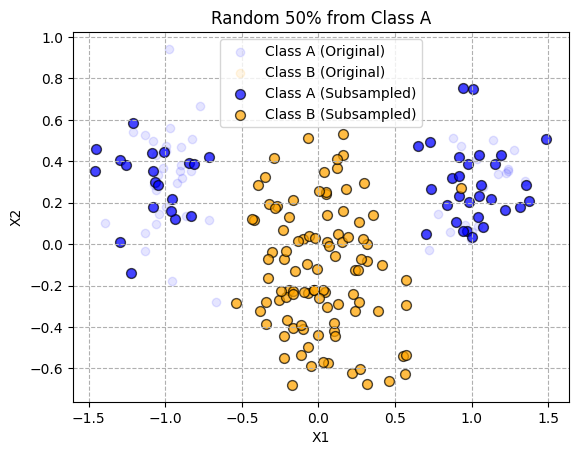

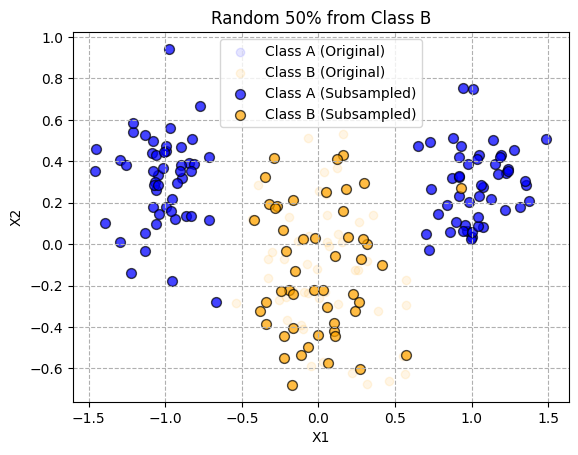

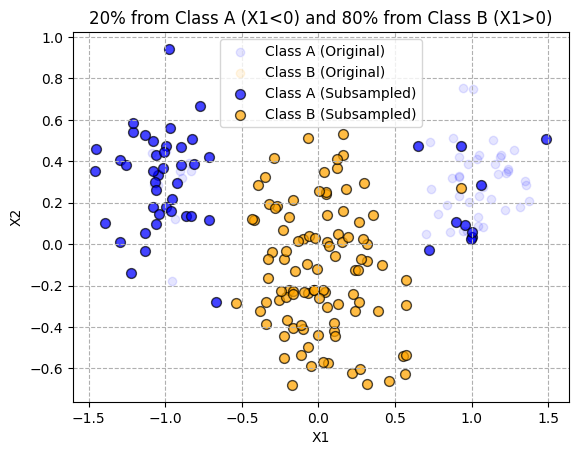

In [12]:
from tools import subsample_random, subsample_conditional

# Random 25% from each class 
data_1, labels_1 = subsample_random(data, labels, 0.25)
plot_datasets(data, labels, data_1, labels_1, "Random 25% from Each Class")

# Random 50% from class A
data_2, labels_2 = subsample_random(data, labels, 0.5, class_label=0)
plot_datasets(data, labels, data_2, labels_2, "Random 50% from Class A")

# Random 50% from class B
data_3, labels_3 = subsample_random(data, labels, 0.5, class_label=1)
plot_datasets(data, labels, data_3, labels_3, "Random 50% from Class B")
 
# 20% from class A where X1 < 0, and 80% where X1 > 0
data_4, labels_4 = subsample_conditional(classA, classB, labels_A, labels_B)
plot_datasets(data, labels, data_4, labels_4, "20% from Class A (X1<0) and 80% from Class B (X1>0)")

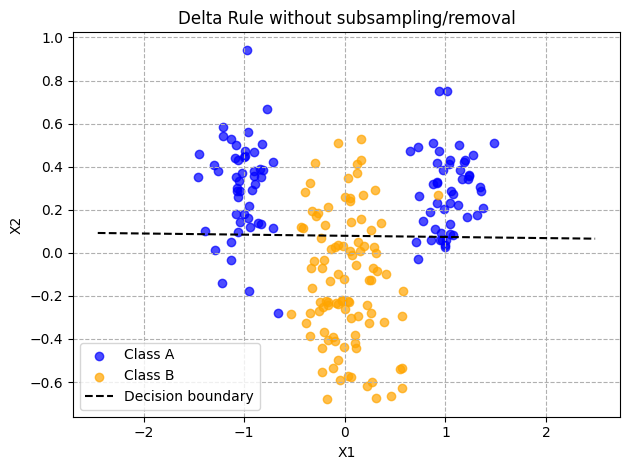

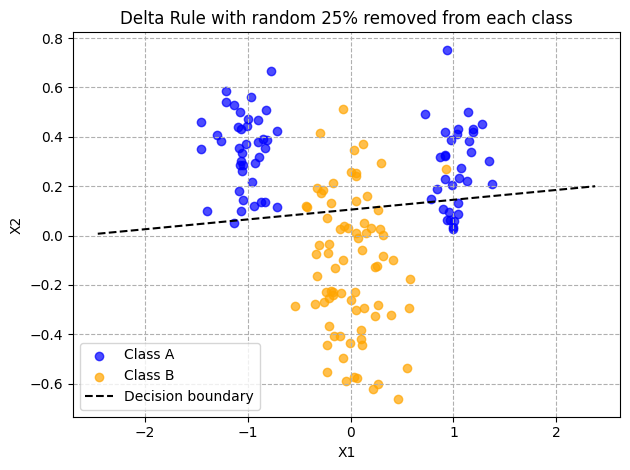

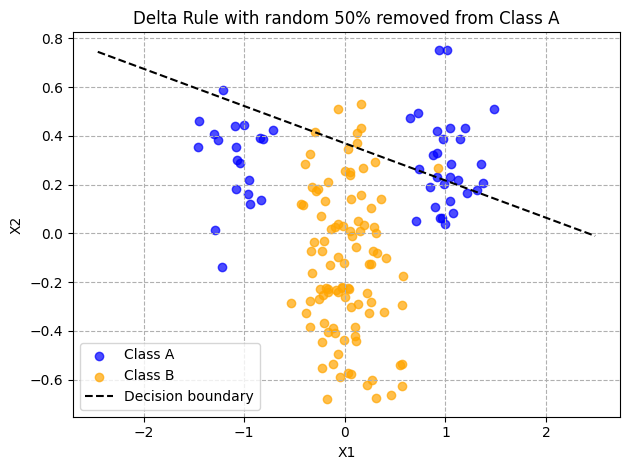

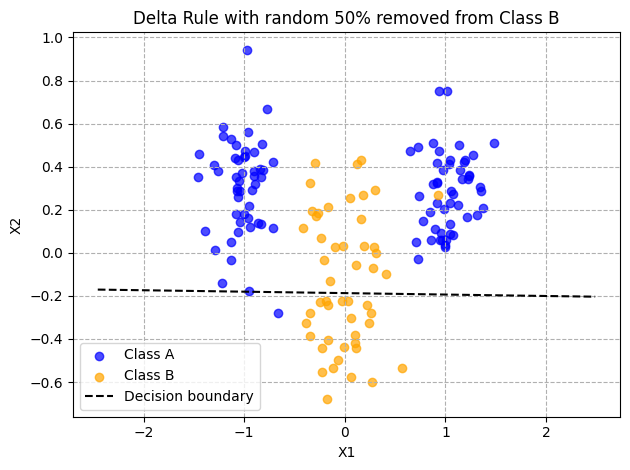

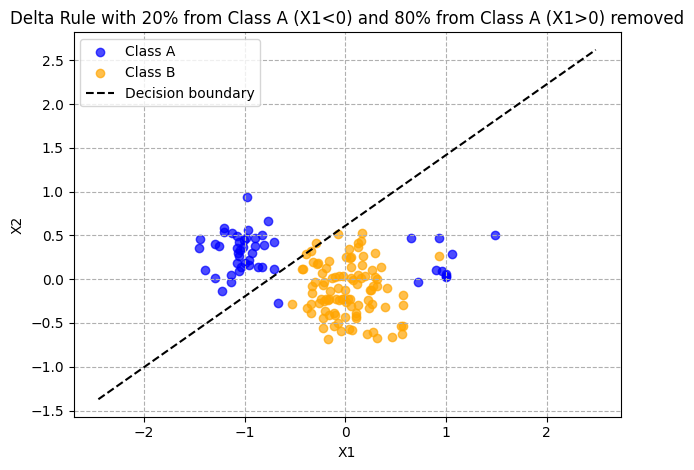

In [13]:
from tools import evaluate_model

change_labels = lambda labels: np.where(labels == 0, -1, 1)

delta_rule = DeltaRuleClassifier()
delta_rule.fit(data, change_labels(labels), learn_rate=0.001, epochs=50, batch=True)
delta_metrics_full = evaluate_model(delta_rule, data, change_labels(labels))
plot_decision_boundary(delta_rule.weights, data, change_labels(labels), "Delta Rule without subsampling/removal")

delta_rule = DeltaRuleClassifier()
delta_rule.fit(data_1, change_labels(labels_1), learn_rate=0.001, epochs=50, batch=True)
delta_metrics_1 = evaluate_model(delta_rule, data_1, change_labels(labels_1))
plot_decision_boundary(delta_rule.weights, data_1, change_labels(labels_1), "Delta Rule with random 25% removed from each class")

delta_rule = DeltaRuleClassifier()
delta_rule.fit(data_2, change_labels(labels_2), learn_rate=0.001, epochs=50, batch=True)
delta_metrics_2 = evaluate_model(delta_rule, data_2, change_labels(labels_2))
plot_decision_boundary(delta_rule.weights, data_2, change_labels(labels_2), "Delta Rule with random 50% removed from Class A")

delta_rule = DeltaRuleClassifier()
delta_rule.fit(data_3, change_labels(labels_3), learn_rate=0.001, epochs=50, batch=True)
delta_metrics_3 = evaluate_model(delta_rule, data_3, change_labels(labels_3))
plot_decision_boundary(delta_rule.weights, data_3, change_labels(labels_3), "Delta Rule with random 50% removed from Class B")

delta_rule = DeltaRuleClassifier()
delta_rule.fit(data_4, change_labels(labels_4), learn_rate=0.001, epochs=50, batch=True)
delta_metrics_4 = evaluate_model(delta_rule, data_4, change_labels(labels_4))
plot_decision_boundary(delta_rule.weights, data_4, change_labels(labels_4), "Delta Rule with 20% from Class A (X1<0) and 80% from Class A (X1>0) removed")


In [14]:
delta_metrics = [
    delta_metrics_full, delta_metrics_1, delta_metrics_2, delta_metrics_3, delta_metrics_4
]

for metric in delta_metrics: 
    print(f"Accuracy: {metric[0]:.2f} Sensitivity: {metric[1]:.2f} Specificity: {metric[2]:.2f}")

Accuracy: 0.80 Sensitivity: 0.74 Specificity: 0.86
Accuracy: 0.81 Sensitivity: 0.77 Specificity: 0.86
Accuracy: 0.76 Sensitivity: 0.93 Specificity: 0.42
Accuracy: 0.83 Sensitivity: 0.50 Specificity: 0.99
Accuracy: 0.92 Sensitivity: 0.99 Specificity: 0.78


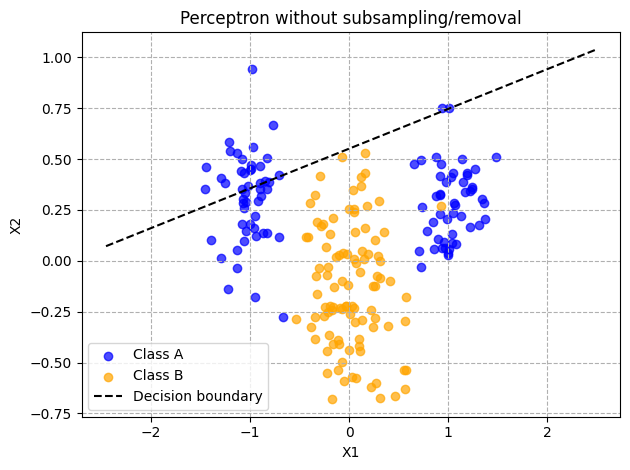

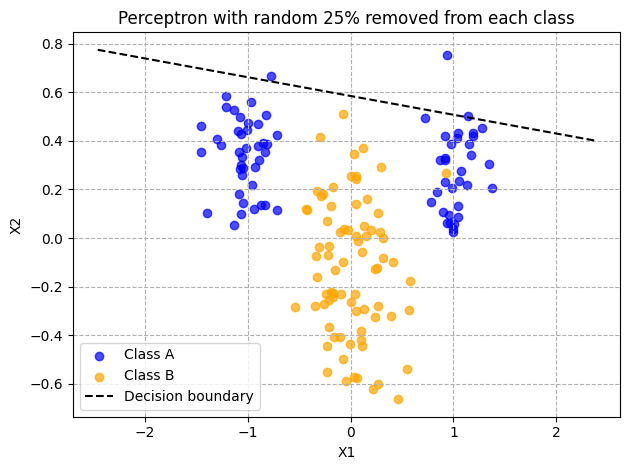

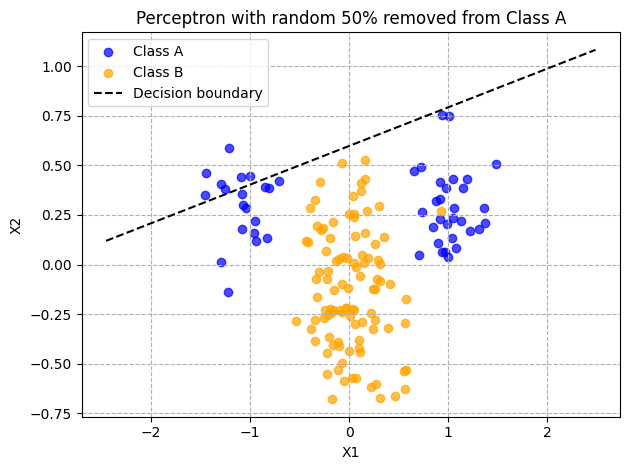

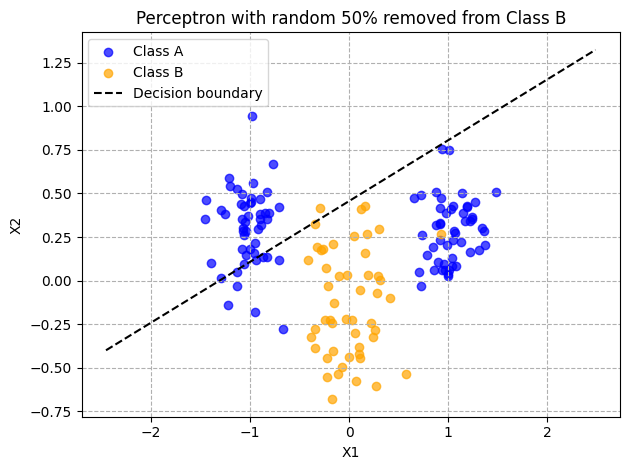

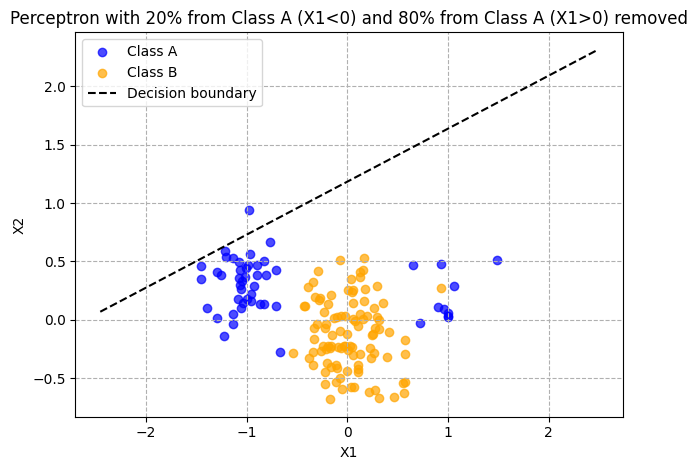

In [15]:
perceptron = PerceptronClassifier()
perceptron.fit(data, labels, learn_rate=0.001, epochs=50, batch=False)
perceptron_metrics_full = evaluate_model(perceptron, data, labels)
plot_decision_boundary(perceptron.weights, data, labels, "Perceptron without subsampling/removal")

perceptron = PerceptronClassifier()
perceptron.fit(data_1, labels_1, learn_rate=0.001, epochs=50, batch=False)
perceptron_metrics_1 = evaluate_model(perceptron, data_1, labels_1)
plot_decision_boundary(perceptron.weights, data_1, labels_1, "Perceptron with random 25% removed from each class")

perceptron = PerceptronClassifier()
perceptron.fit(data_2, labels_2, learn_rate=0.001, epochs=50, batch=False)
perceptron_metrics_2 = evaluate_model(perceptron, data_2, labels_2)
plot_decision_boundary(perceptron.weights, data_2, labels_2, "Perceptron with random 50% removed from Class A")

perceptron = PerceptronClassifier()
perceptron.fit(data_3, labels_3, learn_rate=0.001, epochs=50, batch=False)
perceptron_metrics_3 = evaluate_model(perceptron, data_3, labels_3)
plot_decision_boundary(perceptron.weights, data_3, labels_3, "Perceptron with random 50% removed from Class B")

perceptron = PerceptronClassifier()
perceptron.fit(data_4, labels_4, learn_rate=0.001, epochs=50, batch=False)
perceptron_metrics_4 = evaluate_model(perceptron, data_4, labels_4)
plot_decision_boundary(perceptron.weights, data_4, labels_4, "Perceptron with 20% from Class A (X1<0) and 80% from Class A (X1>0) removed")


In [16]:
perceptron_metrics = [
    perceptron_metrics_full, perceptron_metrics_1, perceptron_metrics_2, perceptron_metrics_3, perceptron_metrics_4
]

for metric in perceptron_metrics: 
    print(f"Accuracy: {metric[0]:.2f} Sensitivity: {metric[1]:.2f} Specificity: {metric[2]:.2f}")

Accuracy: 0.62 Sensitivity: 1.00 Specificity: 0.25
Accuracy: 0.53 Sensitivity: 1.00 Specificity: 0.04
Accuracy: 0.71 Sensitivity: 1.00 Specificity: 0.14
Accuracy: 0.60 Sensitivity: 0.98 Specificity: 0.41
Accuracy: 0.67 Sensitivity: 1.00 Specificity: 0.02
